For this project you must create a data set by simulating a real-world phenomenon of
your choosing.
you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

In [1]:
#Requisite libraries and setings for analysis

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Intro 

For this project I will be investigating the relationship that a number of variables have to a penguins weight. This is inspired by the dataset in increasingly greater use in data analytics called the ```palmer penguin``` dataset. This dataset is been touted as a replacement for the Fisher's Iris as a more ethical version to use. [1] Because of Fisher's links to eugenics, some analysts and computer scientists are uncomforable using this set. 

The ```palmer penguins``` are collected and published by [Dr.Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and [Allison Horst](https://www.allisonhorst.com). The data in this set is collected from the Palmer Archipelago in Antartica and covers a large number of variables, which we will briefly look at below. The dataset is used under the CC-0 licence. 


[1]: https://towardsdatascience.com/data-analysis-in-python-getting-started-with-pandas-8cbcc1500c83

In [2]:
penguins = pd.read_csv("https://raw.githubusercontent.com/kaob1991/Programming-project/main/penguins_lter.csv")

In [3]:
penguins.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0               39.10              18.70               181.00        3750.00   
1               39.50              17.40               186.00        3800.00   
2               40.30              18.00               195.00        3250.00   
3                 nan                nan                  nan            nan   
4               36.70              19.30               193.00        3450.00   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                nan                nan   
1  FEMALE               8.95             -24.69   
2  FEMALE               8.37             -25.33   
3     NaN                nan                nan   
4  FEMALE               8.77             -25.32   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

To make it easier to compare the variables, especially with correlation later in the project, we are removing some of the variables as these are not pertinent to the investigation. 

In [4]:
penguins = penguins.drop(["Sample Number","Delta 15 N (o/oo)", "Delta 13 C (o/oo)","studyName","Region","Island","Stage","Individual ID","Clutch Completion","Date Egg","Comments"], axis = 1)
penguins

Species  Culmen Length (mm)  \
0    Adelie Penguin (Pygoscelis adeliae)               39.10   
1    Adelie Penguin (Pygoscelis adeliae)               39.50   
2    Adelie Penguin (Pygoscelis adeliae)               40.30   
3    Adelie Penguin (Pygoscelis adeliae)                 nan   
4    Adelie Penguin (Pygoscelis adeliae)               36.70   
..                                   ...                 ...   
339    Gentoo penguin (Pygoscelis papua)                 nan   
340    Gentoo penguin (Pygoscelis papua)               46.80   
341    Gentoo penguin (Pygoscelis papua)               50.40   
342    Gentoo penguin (Pygoscelis papua)               45.20   
343    Gentoo penguin (Pygoscelis papua)               49.90   

     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)     Sex  
0                18.70               181.00        3750.00    MALE  
1                17.40               186.00        3800.00  FEMALE  
2                18.00               195.00        3250.00  FEMALE  
3                  nan                  nan            nan     NaN  
4                19.30               193.00        3450.00  FEMALE  
..                 ...                  ...            ...     ...  
339                nan                  nan            nan     NaN  
340              14.30               215.00        4850.00  FEMALE  
341              15.70               222.00        5750.00    MALE  
342              14.80               212.00        5200.00  FEMALE  
343              16.10               213.00        5400.00    MALE  

[344 rows x 6 columns]

We can see from that data set that it covers a wide range of variables. There is culmen length, depth, flipper length, and sex; as well as the variable we will be investigating, the Body mass in grams. In this data set the max weight of a participant is 6300.0 grams, whereas the minimum is 2700.0 grams. This implies a substantial weight difference of almost twice as big. 


In [5]:
weight = penguins["Body Mass (g)"]
min_weight = weight.min()
min_weight

2700.0

In [6]:
max_weight = weight. max()
max_weight

6300.0

One thing that may explain the size differential of the subjects is the species type. There are 3 types of penguin in the current dataset. The Adelie Penguin, the Gentoo penguin, and the Chinstrap penguin. There looks to be more data available for the Adelie and Gentoo Penguin than the Chinstrap in this dataset. Below is a picture detailing the physical appearance of the 3 species.

![Chinstrap Penguin](https://raw.githubusercontent.com/kaob1991/Programming-project/main/pengiuns.jpeg)

In [7]:
penguins["Species"].value_counts()


Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

The other variable that is commonly associated with a weight differential is sex, with the males of most species of animals often weighing more. The scatterplot below would seem to add credence to that theory where the males consistently weigh more than the females. It also would seem that the "Gentoo" species is a overall heavier bird than the Adelie and the Chinstrap penguin. Interestingly, the Chinstrap penguin looks to have a slightly greater variance overall in weight, when accounting for the number of variables in the data. 

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

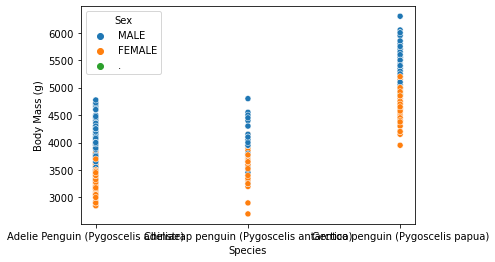

In [8]:
sns.scatterplot(data = penguins, x = "Species",y= "Body Mass (g)", hue = "Sex")

After establishing there is possibly a relationship between the sex of the penguin, and body mass, the next step is to split the dataset into three, based on the species type. This will allow us have a clearer distribution of the data above, and to continue our investigation, and simulation of the data. 

In [9]:
adelie_data = penguins.loc [penguins ["Species"] == "Adelie Penguin (Pygoscelis adeliae)"]
chinstrap_data = penguins.loc [penguins ["Species"] == "Chinstrap penguin (Pygoscelis antarctica)"]
gentoo_data = penguins.loc [penguins ["Species"] == "Gentoo penguin (Pygoscelis papua)"]


## Histograms of body weight
***
The body weights of the birds are drawm below. I've also added a kernel density estimate (KDE) as this will help smooth the data out and provide a clearer view of data trends. 
<br>

There are 3 histograms below relating to the body weight of the 3 birds in the following order:
- Gentoo Penguin
- Adelie Penguin
- Chinstrap penguin

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Count'>

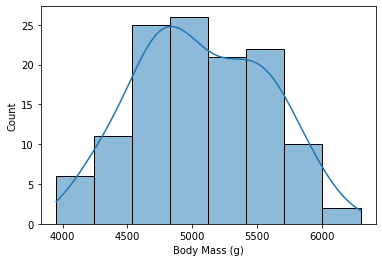

In [10]:
sns.histplot(data = gentoo_data,x = "Body Mass (g)", kde = True)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Count'>

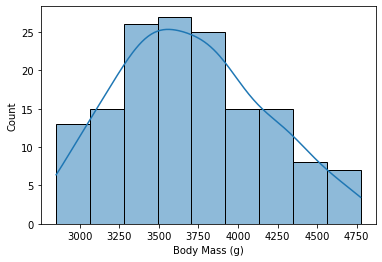

In [11]:
sns.histplot(data = adelie_data,x = "Body Mass (g)", kde = True)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Count'>

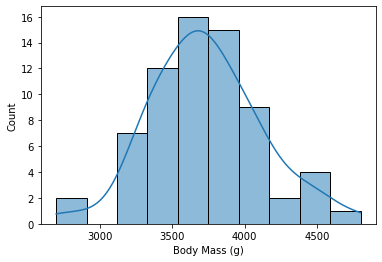

In [12]:
sns.histplot(data = chinstrap_data,x = "Body Mass (g)", kde = True)

# Chinstrap scatterplots

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

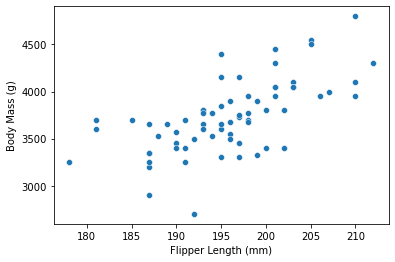

In [13]:
sns.scatterplot(data= chinstrap_data, x="Flipper Length (mm)", y="Body Mass (g)")


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

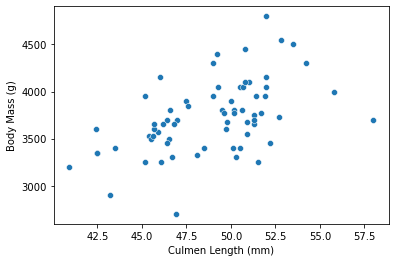

In [14]:
sns.scatterplot(data= chinstrap_data, x="Culmen Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

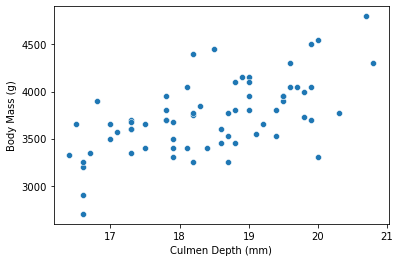

In [15]:
sns.scatterplot(data= chinstrap_data, x="Culmen Depth (mm)", y="Body Mass (g)")

In [16]:
chinstrap_data.corr()

Culmen Length (mm)  Culmen Depth (mm)  \
Culmen Length (mm)                 1.00               0.65   
Culmen Depth (mm)                  0.65               1.00   
Flipper Length (mm)                0.47               0.58   
Body Mass (g)                      0.51               0.60   

                     Flipper Length (mm)  Body Mass (g)  
Culmen Length (mm)                  0.47           0.51  
Culmen Depth (mm)                   0.58           0.60  
Flipper Length (mm)                 1.00           0.64  
Body Mass (g)                       0.64           1.00

# Adelie Scatterplots

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

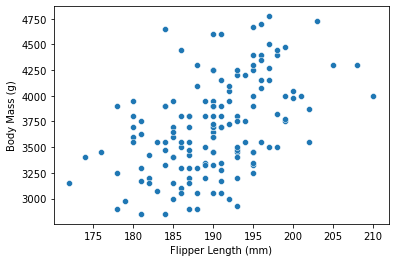

In [17]:
sns.scatterplot(data= adelie_data, x="Flipper Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

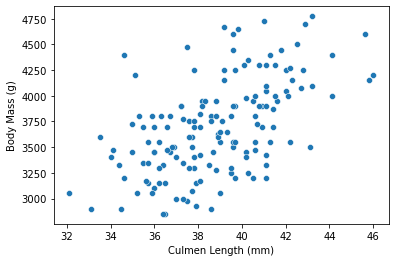

In [18]:
sns.scatterplot(data= adelie_data, x="Culmen Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

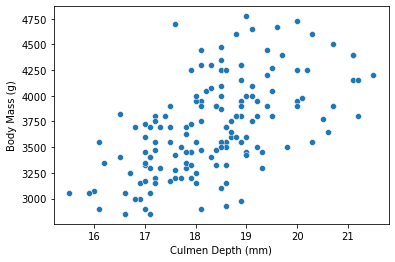

In [19]:
sns.scatterplot(data= adelie_data, x="Culmen Depth (mm)", y="Body Mass (g)")

In [20]:
adelie_data.corr()

Culmen Length (mm)  Culmen Depth (mm)  \
Culmen Length (mm)                 1.00               0.39   
Culmen Depth (mm)                  0.39               1.00   
Flipper Length (mm)                0.33               0.31   
Body Mass (g)                      0.55               0.58   

                     Flipper Length (mm)  Body Mass (g)  
Culmen Length (mm)                  0.33           0.55  
Culmen Depth (mm)                   0.31           0.58  
Flipper Length (mm)                 1.00           0.47  
Body Mass (g)                       0.47           1.00

# Gentoo Scatterplots

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

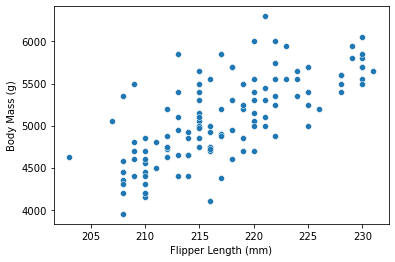

In [21]:
sns.scatterplot(data= gentoo_data, x="Flipper Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

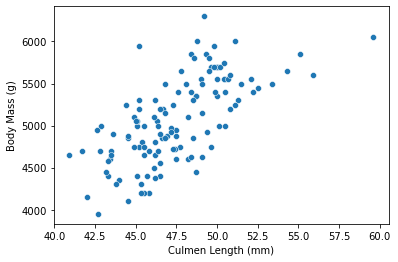

In [22]:
sns.scatterplot(data= gentoo_data, x="Culmen Length (mm)", y="Body Mass (g)")

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

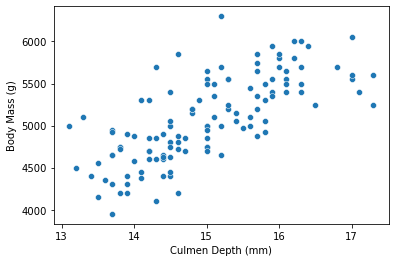

In [23]:
sns.scatterplot(data= gentoo_data, x="Culmen Depth (mm)", y="Body Mass (g)")

In [24]:
gentoo_data.corr()

Culmen Length (mm)  Culmen Depth (mm)  \
Culmen Length (mm)                 1.00               0.64   
Culmen Depth (mm)                  0.64               1.00   
Flipper Length (mm)                0.66               0.71   
Body Mass (g)                      0.67               0.72   

                     Flipper Length (mm)  Body Mass (g)  
Culmen Length (mm)                  0.66           0.67  
Culmen Depth (mm)                   0.71           0.72  
Flipper Length (mm)                 1.00           0.70  
Body Mass (g)                       0.70           1.00

Having investigated the correlation between body mass and the other 3 variables of each of the species the only one that has a strong relationship is the Gentoo Species. Therefore we will continue our investigations using just this species as the body mass is a good predictor of the other variables. 

Taking a closer look at the Gentoo species and the relationship with the sex of the bird, we can see on average the body mass for the male is 5484.84 grams and the female is 4679.74 grams.

In [25]:
gentoo_female = gentoo_data.loc [gentoo_data ["Sex"] == "FEMALE"]
gentoo_male = gentoo_data.loc [gentoo_data ["Sex"] == "MALE"]

In [26]:
gentoo_female.describe()

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count               58.00              58.00                58.00   
mean                45.56              14.24               212.71   
std                  2.05               0.54                 3.90   
min                 40.90              13.10               203.00   
25%                 43.85              13.80               210.00   
50%                 45.50              14.25               212.00   
75%                 46.88              14.60               215.00   
max                 50.50              15.50               222.00   

       Body Mass (g)  
count          58.00  
mean         4679.74  
std           281.58  
min          3950.00  
25%          4462.50  
50%          4700.00  
75%          4875.00  
max          5200.00

In [27]:
gentoo_male.describe()

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count               61.00              61.00                61.00   
mean                49.47              15.72               221.54   
std                  2.72               0.74                 5.67   
min                 44.40              14.10               208.00   
25%                 48.10              15.20               218.00   
50%                 49.50              15.70               221.00   
75%                 50.50              16.10               225.00   
max                 59.60              17.30               231.00   

       Body Mass (g)  
count          61.00  
mean         5484.84  
std           313.16  
min          4750.00  
25%          5300.00  
50%          5500.00  
75%          5700.00  
max          6300.00

# Graphical display

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Count'>

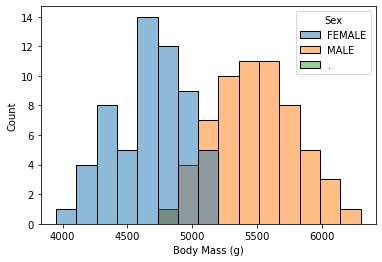

In [28]:
sns.histplot(data= gentoo_data, x = "Body Mass (g)", hue = "Sex", bins = 15)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Count'>

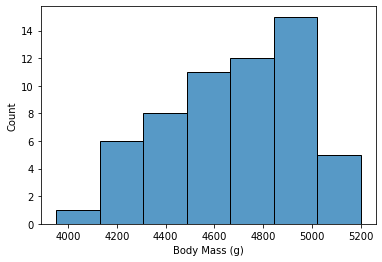

In [29]:
sns.histplot(data= gentoo_female, x = "Body Mass (g)")

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Count'>

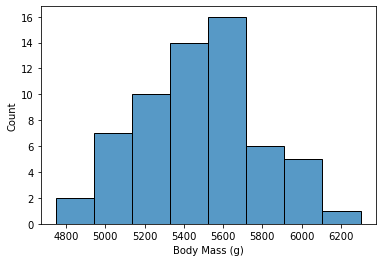

In [30]:
sns.histplot(data= gentoo_male, x = "Body Mass (g)")

# REFERENCES

-https://towardsdatascience.com/data-analysis-in-python-getting-started-with-pandas-8cbcc1500c83